# Problem 1

The goal of this question is to familiarize you with sine waves and audio  as  well  as  the  basic  operations  from  which  the  DFT  is  built  i.e  the vector inner product and sinusoidal basis functions.  You can use any programming language for your implementation but it will probably be easier to do in an environment that supports plotting such as Matlab/Octave or Python/NumPy/SciPy/Matplotlib.  Feel free to use the code we examined during class as a foundation for your submission.

## 1.a (\*)

Write a function that makes a mixture of three harmonically related sinusoids with frequencies $f$, $2f$, $3f$ with user provided amplitudes and phases.  Show a time domain plot of adding three sinusoids with amplitude $1.0$. $0.5$, $0.33$ corresponding respectively to $f$, $2f$, $3f$ all with 0 phases and another plot with random phases.  Using this function generate two seconds of audio in .wav format for a mixture with $f = 440 Hz$. Listen to the generated mixture using an audio editor like Audacity. Provide a figure showing the spectrogram of your mixture using Audacity.

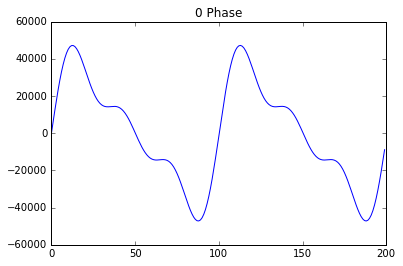

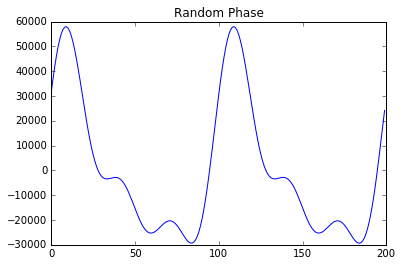

In [27]:
%matplotlib inline
from pylab import *
import wave
import struct
import random

# Config for audio.
samplingRate = 44100
numSamples = 2 * 44100
numCycles = numSamples / samplingRate
frequency = 440

time_space = linspace(0, numCycles, numSamples)

# Audio config
amplitude = 0.8
phase = 0.0
maxVol= 2**15 - 1.0 # maximum amplitude

def problem_1_a(amp_1, phase_1, amp_2, phase_2, amp_3, phase_3):
    # Build the sinewaves.
    x_1 = amp_1 * sin(2 * pi * frequency * time_space + phase_1) * maxVol
    x_2 = amp_2 * sin(2 * pi * 2*frequency * time_space + phase_2) * maxVol
    x_3 = amp_3 * sin(2 * pi * 3*frequency * time_space + phase_3) * maxVol
    
    return [x_1[i] + x_2[i] + x_3[i] for i in range(0, len(x_1))]
    
### 0 Phase
x_space_0_phase = problem_1_a(1.0, 0.0, 0.5, 0.0, 0.33, 0.0)
    
# Create the plot.
figure()
title("0 Phase")
plot(time_space[0:200] * samplingRate, x_space_0_phase[0:200]);
    
# Create the audio file.
audio_file = wave.open('1a_0_phase.wav', 'w')
audio_file.setparams((1, 2, samplingRate, numSamples, "NONE", "Uncompressed"))
for i in x_space_0_phase:
    packed_value = struct.pack('h', int16(i))
    audio_file.writeframes(packed_value)
audio_file.close()
    
### Random Phase
x_space_rand_phase = problem_1_a(1.0, random.random(), 0.5, random.random(), 0.33, random.random())

# Create the plot.
figure()
title("Random Phase")
plot(time_space[0:200] * samplingRate, x_space_rand_phase[0:200])
    
# Create the audio file.
audio_file = wave.open('1a_rand_phase.wav', 'w')
audio_file.setparams((1, 2, samplingRate, numSamples, "NONE", "Uncompressed"))
for i in x_space_rand_phase:
    packed_value = struct.pack('h', int16(i))
    audio_file.writeframes(packed_value)
audio_file.close()


Spectrogram for 0 phase:

![](images/1a_0_phase.png)

Spectrogram for random phase:

![](images/1a_rand_phase.png)

## 1.b (\*)

Generate 3 seconds of audio containing a mixture of two sine waves with frequencies $500 Hz$ and $502 Hz$. Listen to the generated sound. What do you hear? Try to explain what is happening.

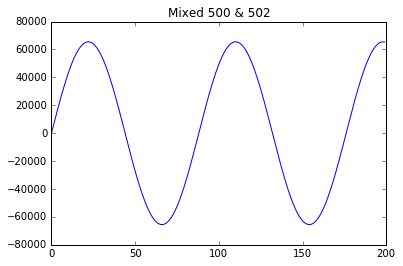

In [5]:
%matplotlib inline
from pylab import *
import wave
import struct
import random

# Config for audio.
samplingRate = 44100
numSamples = 2 * 44100
numCycles = numSamples / samplingRate
maxVol= 2**15 - 1.0 # maximum amplitude

time_space = linspace(0, numCycles, numSamples)

x_500 = 1 * sin(2 * pi * 500 * time_space) * maxVol
x_502 = 1 * sin(2 * pi * 502 * time_space) * maxVol
x_total = [x_500[i] + x_502[i] for i in range(0, len(x_500))]

# Plot
figure()
title("Mixed 500 & 502")
plot(time_space[0:200] * samplingRate, x_total[0:200])

# Create the audio file.
audio_file = wave.open('wavs/1b.wav', 'w')
audio_file.setparams((1, 2, samplingRate, numSamples, "NONE", "Uncompressed"))
for i in x_total:
    packed_value = struct.pack('h', int16(i))
    audio_file.writeframes(packed_value)
audio_file.close()

Spectrogram:

![](images/1b.png)

It sounds like a beeping with a bit of an echo. TODO: Why?

## 1.c (\*)

Read about the concept of signal to noise ratio (SNR). Write a function that takes as input a SNR in decibels (dB) and a frequency in Hz in order to generate a mixture of white noise and a 440 sine wave. Generate 2 seconds of the corresponding audio and view/listen to it in Audacity.

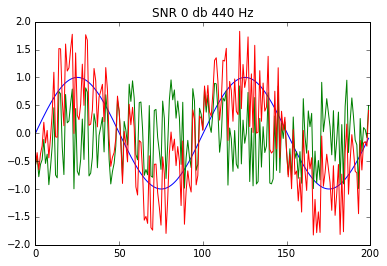

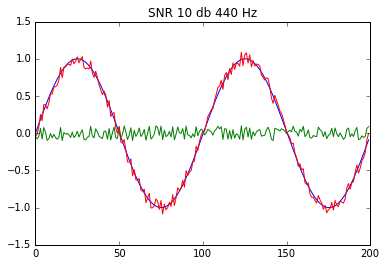

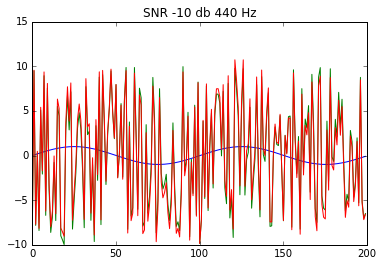

In [3]:
%matplotlib inline
from pylab import *
import sympy
import wave
import struct
import numpy

# Config for audio.
samplingRate = 44100
numSamples = 2 * 44100
numCycles = numSamples / samplingRate

# Audio config
maxVol= 2**15 - 1.0 # maximum amplitude

time_space = linspace(0, numCycles, numSamples)

def problem_1_c(snr_in_decibels, frequency_in_hz):
    # Generate Signal
    signal_power = 1
    signal_wave = signal_power * sin(2 * pi * frequency_in_hz * time_space)
    # Generate Noise.
    p_noise, p_signal, snr = sympy.symbols("p_noise, p_signal, snr")
    noise_power = sympy.solve(sympy.Eq(10 * sympy.log(p_signal / p_noise, 10), snr), p_noise)[0].evalf(subs = {
        p_signal: signal_power,
        snr: snr_in_decibels
    })
    noise_wave = ((numpy.random.ranf(size = numSamples) * 2) - 1) * noise_power
    # Plot
    figure()
    title("SNR " + str(snr_in_decibels) + " db " + str(frequency_in_hz) + " Hz")
    plot(time_space[0:200] * samplingRate, signal_wave[0:200])
    plot(time_space[0:200] * samplingRate, noise_wave[0:200])
    plot(time_space[0:200] * samplingRate, noise_wave[0:200] + signal_wave[0:200])
    # Create the audio file.
    audio_file = wave.open('wavs/1c-' + str(snr_in_decibels) + '-' + str(frequency_in_hz) + '.wav', 'w')
    audio_file.setparams((1, 2, samplingRate, numSamples, "NONE", "Uncompressed"))
    for i in noise_wave + signal_wave:
        packed_value = struct.pack('h', int16(i * maxVol))
        audio_file.writeframes(packed_value)
    audio_file.close()

problem_1_c(0, 440)
problem_1_c(10, 440)
problem_1_c(-10, 440)

## 1.d (\*\*)

Consider a mixture of 3 harmonically related sinusoids as the ones you created.  What you would like to devise is a process to estimate the amplitudes of each sine wave assuming that you know the frequencies that the mixture is composed of.  Try taking the inner product of a mixture with a unit amplitude sinusoid of frequency $f$, then take the inner product of the mixture with a unit amplitude sinusoid of frequency $2f$. Make sure that the phases of the "probing" sinusoid are the same as the phases of the mixture sinusoids.  What do you observe about the inner products ?  Describe how you could modify this procedure to estimate the amplitude of mixtures of 4 sinusoids mixed with noise.

## 1.e (\*\*\*)

Now let's make the scenario a little bit more challenging. We still know the frequencies of the mixture but we want to estimate not only the amplitudes but also the phases. Observe what happens with the inner products when the phase is not zero.  Plot the inner products of the input mixture for all possible phase shifts of the probing sinusoid. On that plot do you notice anything different about the "correct" phase ?  Based on your observation describe and also implement an algorithm for estimating both amplitudes and phases.  Show using one or more examples how it works.

# Problem 2

The goal of this question is to explore one of the most important tools in music information retrievial, signal processing, and engineering in general the Discrete Fourier Transform (DFT) and its computationally effcient implementation the Fast Fourier Transform. In addition we will continue looking into audio programming and processing sound in buffers.

## 2.a (\*)

Write code to read/write data from a .wav file (you can use a  library)  in  buffers  of  2048.   Verify  that  your  code  can  read,  apply simple processing (like a gain) and write audio files correctly.

In [25]:
%matplotlib inline
from pylab import *
import sympy
import wave
import struct
import numpy

buffer_size = 2048
audio_file = wave.open('wavs/1a_0_phase.wav', 'r')
out_file = wave.open('wavs/2a.wav', 'w')

out_file.setparams(audio_file.getparams())

num_of_frames = buffer_size / (audio_file.getsampwidth() + audio_file.getnchannels())

while True:
    frames = audio_file.readframes(int(num_of_frames))
    if not frames:
        break
    new_frames = bytearray(frames)
    for idx in range(0, len(new_frames)):
        # Simple Gain
        if new_frames[idx] is not 255:
            new_frames[idx] += 1
    out_file.writeframes(new_frames)
    

## 2.b (\*)

Using any library or implementation of the Fast Fourier Transform for your programming language calculate the frequency domain complex spectrum of the 3 component mixture signal from question 1. Plot the magnitude spectrum.

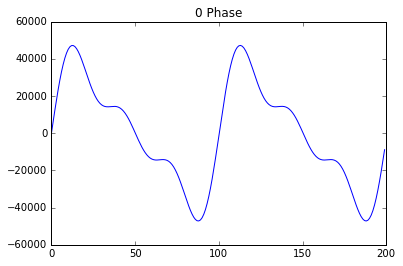

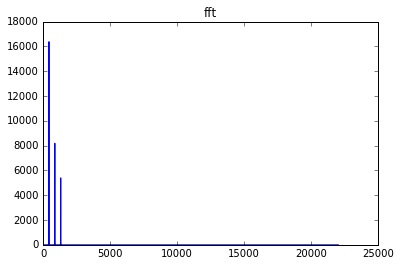

In [86]:
%matplotlib inline
from pylab import *
import wave
import struct
import random
import numpy

# Config for audio.
samplingRate = 44100
numSamples = 2 * 44100
numCycles = numSamples / samplingRate
frequency = 440
maxVol= 2**15 - 1.0 # maximum amplitude

time_space = linspace(0, numCycles, numSamples)

def problem_1_a(amp_1, phase_1, amp_2, phase_2, amp_3, phase_3):
    # Build the sinewaves.
    x_1 = amp_1 * sin(2 * pi * frequency * time_space + phase_1) * maxVol
    x_2 = amp_2 * sin(2 * pi * 2*frequency * time_space + phase_2) * maxVol
    x_3 = amp_3 * sin(2 * pi * 3*frequency * time_space + phase_3) * maxVol
    return [x_1[i] + x_2[i] + x_3[i] for i in range(0, len(x_1))]

x_space_0_phase = problem_1_a(1.0, 0.0, 0.5, 0.0, 0.33, 0.0)

# Create the plot.
figure()
title("0 Phase")
plot(time_space[0:200] * samplingRate, x_space_0_phase[0:200]);

size_fft = len(x_space_0_phase)
fft_space = (numpy.fft.fft(x_space_0_phase) / size_fft)[0 : int(size_fft / 2)]

figure()
title("fft")

##
size = len(x_space_0_phase)
series = arange(size)
intervals = size / samplingRate
freq = (series / intervals)[0 : int(size / 2)]
##

plot(freq, numpy.abs(fft_space))

## 2.c (\*)

Using a programming language of your choice write code to directly compute the Discrete Fourier Transform (DFT) of an input array. You should express everything directly at low level using array access, for loops, and arithmetic operations i.e do not use a complex number type if the language supports it, and do not use any matrix multiplication facilities. Provide a listing of your code and a plot showing that your algorithm produces the same magnitude response as a Fast Fourier Transform routine in your language of choice that is either built in or freely available. Verify that your output is identical with the one by the FFT implementation you used.

## 2.d (\*\*)

Modify the code that reads/writes data in buffers so that each buffer is converted to a frequency domain complex spectrum. Compute magnitude and phase spectrum for each buffer and plot an example for each type. Convert the magnitude and phase spectra back to a complex spectrum and then using the inverse DFT return to the time domain and write the buffer to an audio file. If everything is working correctly you should get back the original audio. Once you have verified that's the case then you can perform some simple spectral processing. Replace the phase spectrum with appropriate random numbers uniformly distributed. How is the resulting audio affected? Try to describe what you hear especially when processing pieces of music.  Experiment with large windows corresponding to 3-5 seconds. What happens?

## 2.e (\*)

Read about the overlap-add of computing the Short Time Fourier Transform. Basically the idea is to window each  buffer and read the data in overlapping chunks so that when they are summed the two windows sum up to 1. First ensure that you can do proper overlap-add by reading buffer that overlap by half and windowing them appropriately.  Once you have that working apply the same process as the previous question of randomizing the phase spectrum. What has changed compared to before?

In [1]:
%matplotlib inline
from pylab import *
import wave


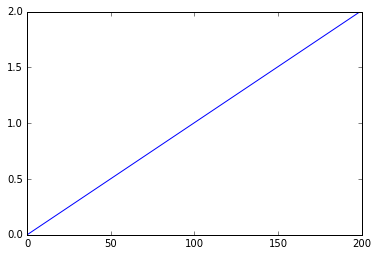

In [2]:
# create nSamples time samples 
samplingRate = 100;
numSamples = 200.0; 
numCycles = numSamples / samplingRate;
t = linspace(0, numCycles, numSamples);
plot(t);

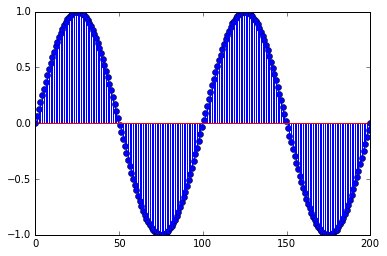

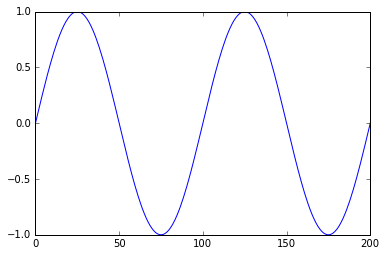

In [3]:
# slice the pizza into numSamples slices if numCycles is 1 
x = sin(2 * pi * t);
stem(t * samplingRate,x);
figure();
plot(t * samplingRate, x);

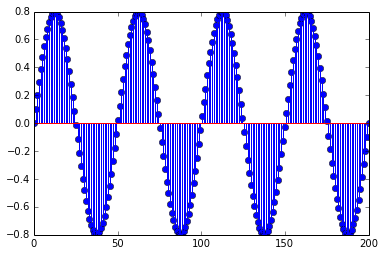

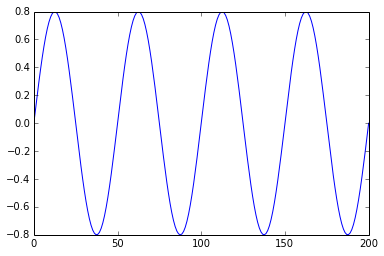

In [137]:
# let's adjust the sinusoid by amplitude and phase 
amplitude = 0.8;
phase = 0.0;
frequency = 2;
x = amplitude * sin(2 * pi * frequency * t + phase);
stem(t * samplingRate,x);
figure()
plot(t * samplingRate, x);


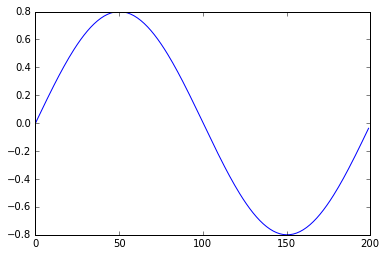

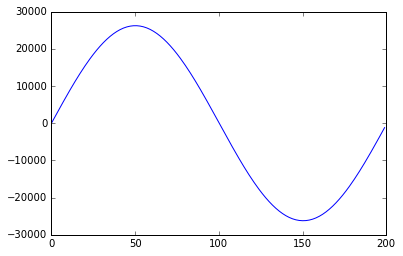

In [31]:
# let's create some audio 
samplingRate = 44100.0;
numSamples = 2 * 44100.0;
numCycles = numSamples / samplingRate;
# the time axis 
t = linspace(0, numCycles, numSamples);
frequency = 220;
amplitude = 0.8;
phase = 0.0;
x = amplitude * sin(2 * pi * frequency * t + phase);
figure()
plot(t[0:200] * samplingRate, x[0:200]);
maxVol=2**15-1.0 #maximum amplitude
x = x * maxVol 
figure()
plot(t[0:200] * samplingRate, x[0:200]);


In [12]:
f = wave.open('sinusoid_' + str(frequency) + 'Hz.wav', 'w');
f.setparams((1, 2, samplingRate, numSamples, "NONE", "Uncompressed"))
f.writeframes(x.astype(int16).tostring())
f.close()


error: required argument is not an integer

1.0


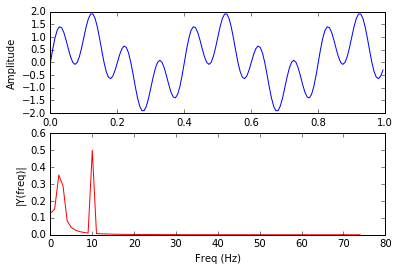

In [67]:
from numpy import sin, linspace, pi
from pylab import plot, show, title, xlabel, ylabel, subplot
from scipy import fft, arange

def plotSpectrum(y,Fs):
 """
 Plots a Single-Sided Amplitude Spectrum of y(t)
 """
 n = len(y) # length of the signal
 k = arange(n)
 T = n/Fs
 
 
 frq = k/T # two sides frequency range
 print(T)
 frq = frq[range(int(n/2))] # one side frequency range

 Y = fft(y)/n # fft computing and normalization
 Y = Y[range(int(n/2))]
 
 plot(frq,abs(Y),'r') # plotting the spectrum
 xlabel('Freq (Hz)')
 ylabel('|Y(freq)|')

Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = arange(0,1,Ts) # time vector

ff = 5;   # frequency of the signal
y = sin(1*pi*ff*t) + sin(4*pi*ff*t)

subplot(2,1,1)
plot(t,y)
xlabel('Time')
ylabel('Amplitude')
subplot(2,1,2)
plotSpectrum(y,Fs)
show()